### Scenario

A fast-food chain plans to add a new item to its menu. However, they are still undecided between three possible marketing campaigns for promoting the new product. In order to determine which promotion has the greatest effect on sales, the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item are recorded for the first four weeks.

### Goal

Evaluate A/B testing results and decide which marketing strategy works the best.

### Columns

__MarketID__: unique identifier for market <br />
__MarketSize__: size of market area by sales <br />
__LocationID__: unique identifier for store location <br />
__AgeOfStore__: age of store in years <br />
__Promotion__: one of three promotions that were tested <br />
__week__: one of four weeks when the promotions were run <br />
__SalesInThousands__: sales amount for a specific LocationID, Promotion, and week <br />

### Exploratory Data Analysis

In [55]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import scikit_posthocs as sp

In [8]:
df = pd.read_csv('WA_Marketing-Campaign.csv')

In [9]:
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [4]:
df.dtypes

MarketID              int64
MarketSize           object
LocationID            int64
AgeOfStore            int64
Promotion             int64
week                  int64
SalesInThousands    float64
dtype: object

In [5]:
df.isna().sum()

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

In [53]:
df.groupby('Promotion').agg({'SalesInThousands': [np.mean, np.median, min, max]})

SalesInThousands                      
                      mean  median    min    max
Promotion                                       
1                58.099012  55.385  30.81  99.65
2                47.329415  45.385  17.34  88.64
3                55.364468  51.165  22.18  96.48

Text(0.5, 1.0, 'Revenue of Different Promotions')

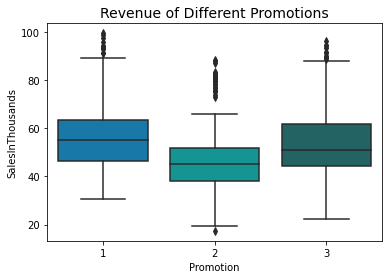

In [319]:
sns.boxplot(data=df, x='Promotion', y='SalesInThousands', palette="winter_d")
plt.title('Revenue of Different Promotions', fontsize=14)

Text(0.5, 1.0, 'Revenue of Different Promotions by weeks')

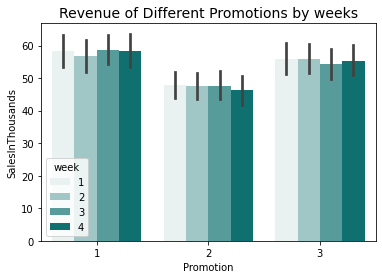

In [320]:
sns.barplot(data=df, x='Promotion', y='SalesInThousands', hue='week', color='teal')
plt.title('Revenue of Different Promotions by weeks', fontsize=14)

→ Advertising groups 1 and 3 have higher average sales than advertising group 2, but group 1 is slightly better than group 3, and the indicators practically haven't changed from week to week.

In [321]:
percent_of_sales = df.groupby('Promotion', as_index=True) \
.agg({'SalesInThousands':'sum'})['SalesInThousands'].transform(lambda x: x/x.sum())

Text(0.5, 1.0, 'Distribution of Promotions')

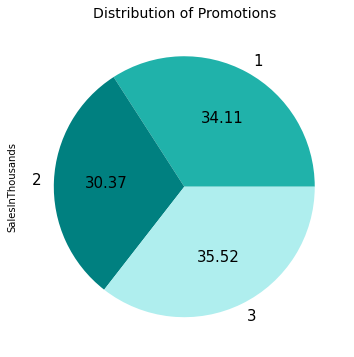

In [322]:
percent_of_sales.plot.pie(labels=[1, 2, 3],
    colors=["lightseagreen", "teal", "paleturquoise"],
    autopct="%.2f",
    fontsize=15,
    figsize=(6, 6))
plt.title('Distribution of Promotions', fontsize=14)

→ The graph shows that each advertising group takes about a third of the total sales. However, advertising group 3 has the largest share of sales: almost 36%.

In [323]:
marketsize_by_promotion = df.groupby(['Promotion', 'MarketSize'], as_index=False).agg({'MarketID':'count'})

Text(0.5, 1.0, 'Number of Promotions by Market Sizes')

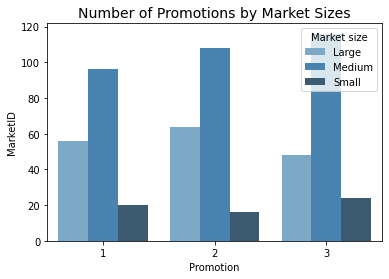

In [324]:
sns.barplot(data=marketsize_by_promotion, x='Promotion', y='MarketID', hue='MarketSize', palette="Blues_d")
plt.legend(title='Market size')
plt.title('Number of Promotions by Market Sizes', fontsize=14)

→ Medium-sized markets make up the largest part in each of the advertising groups, and small-sized markets make up the smallest one.

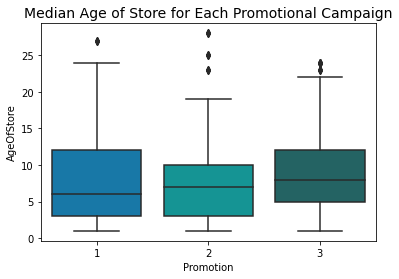

In [12]:
sns.boxplot(data=df, x='Promotion', y='AgeOfStore', palette="winter_d")
plt.title('Median Age of Store for Each Promotional Campaign', fontsize=14);

→ The median age of store varies slightly between promotional campaigns, and for promotion 3 it has the highest median age.

### Forming groups

In [15]:
promotion_1 = df.loc[df['Promotion']==1]
promotion_1.shape

(172, 7)

In [16]:
promotion_2 = df.loc[df['Promotion']==2]
promotion_2.shape

(188, 7)

In [17]:
promotion_3 = df.loc[df['Promotion']==3]
promotion_3.shape

(188, 7)

### Comparing groups for statistical differences

__Testing the assumptions of independent samples__

The hypothesis of normality assumption (Shapiro-Wilk test)

H0: the sample data was drawn from a normal distribution <br />
H1: the sample data was drawn from a non-normal distribution

In [33]:
test_stat_test_1, pvalue_test_1 = stats.shapiro(promotion_1['SalesInThousands'])
print('For promotional group 1: Test Stat = %.4f, p-value = %.4f' % (test_stat_test_1, pvalue_test_1)) 

For promotional group 1: Test Stat = 0.9153, p-value = 0.0000


In [34]:
test_stat_test_2, pvalue_test_2 = stats.shapiro(promotion_2['SalesInThousands'])
print('For promotional group 2: Test Stat = %.4f, p-value = %.4f' % (test_stat_test_2, pvalue_test_2))

For promotional group 2: Test Stat = 0.9145, p-value = 0.0000


In [35]:
test_stat_test_3, pvalue_test_3 = stats.shapiro(promotion_3['SalesInThousands'])
print('For promotional group 2: Test Stat = %.4f, p-value = %.4f' % (test_stat_test_3, pvalue_test_3))

For promotional group 2: Test Stat = 0.9208, p-value = 0.0000


→ For all three samples p-value less than 0.05, so we reject the null hypothesis that the data is normally distributed.

The Hypothesis of homogeneity of variances (Levene Test)

H0: The variances are equal across all samples <br />
H1: The variances are not equal for at least one pair

In [39]:
test_stat, pvalue = stats.levene(promotion_1['SalesInThousands'], promotion_2['SalesInThousands'], promotion_3['SalesInThousands'])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue)) 

Test Stat = 1.2697, p-value = 0.2818


→ p-value higher than 0.05, the H0 hypothesis can not be rejected, so variances are homogeneous.

Standard deviations are very similar, but the normality assumption was rejected, so we should apply non-parametric tests. We will use the Kruskal-Wallis one-way ANOVA.

__A/B Test Hypothesis:__
- H0 (M1 = M2 = M3) : There is no statistically significant difference in revenue between advertising groups.

- H1 (M1 != M2 != M3) : There is a statistically significant difference in revenue between advertising groups.

In [40]:
stats.kruskal(promotion_1['SalesInThousands'], promotion_2['SalesInThousands'], promotion_3['SalesInThousands'])

KruskalResult(statistic=53.29475169322799, pvalue=2.6741866266697816e-12)

→ p-value less than 0.05, the null hypothesis can be rejected. So we will apply a post-hoc test to understand how they differ. We will use a non-parametric equivalent of Tukey HSD - Dunn's test.

In [51]:
sp.posthoc_dunn([promotion_1['SalesInThousands'], promotion_2['SalesInThousands'], promotion_3['SalesInThousands']])

,1,2,3
1,1.000000e+00,2.153947e-12,4.862200e-02
2,2.153947e-12,1.000000e+00,2.361023e-07
3,4.862200e-02,2.361023e-07,1.000000e+00


→ p-value less than 0.05 for all comparisons, so all the promotions have statistically significant differences.

__Results:__
There is a statistical difference in revenue between all advertising groups, and promotion 1 has the highest revenue, therefore, it is the most efficient of the three. Thus we recommend using the first advertising campaign for promotion their new products in stores.